In [ ]:

!pip install -q scikit-learn matplotlib


In [1]:
import tensorflow as tf
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()


print(f'Training data shape: {x_train.shape}, Training labels shape: {y_train.shape}')
print(f'Testing data shape: {x_test.shape}, Testing labels shape: {y_test.shape}')


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Training data shape: (50000, 32, 32, 3), Training labels shape: (50000, 1)
Testing data shape: (10000, 32, 32, 3), Testing labels shape: (10000, 1)


In [2]:
# Flatten images
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# Normalize pixel values
x_train_flat = x_train_flat / 255.0
x_test_flat = x_test_flat / 255.0

# Check the shape of flattened and normalized data
print(f'Flattened training data shape: {x_train_flat.shape}')
print(f'Flattened testing data shape: {x_test_flat.shape}')


Flattened training data shape: (50000, 3072)
Flattened testing data shape: (10000, 3072)


In [3]:
#4
from sklearn.model_selection import train_test_split

# Split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(x_train_flat, y_train, test_size=0.2, random_state=42)

# Check the shape of the split data
print(f'Shape of training data: {X_train.shape}, Shape of validation data: {X_val.shape}')


Shape of training data: (40000, 3072), Shape of validation data: (10000, 3072)


In [4]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=10, min_samples_split=10, random_state=42)

dt_clf.fit(X_train, y_train.ravel())

print("Decision Tree model training completed.")


Decision Tree model training completed.


In [5]:
from sklearn.metrics import classification_report, confusion_matrix


y_val_pred_dt = dt_clf.predict(X_val)

print("Decision Tree Classification Report:\n", classification_report(y_val, y_val_pred_dt, target_names=[str(i) for i in range(10)]))
print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred_dt))


Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.39      0.38       973
           1       0.32      0.27      0.29       979
           2       0.21      0.11      0.14      1030
           3       0.19      0.17      0.18      1023
           4       0.24      0.34      0.28       933
           5       0.25      0.23      0.24      1015
           6       0.28      0.42      0.33       996
           7       0.30      0.29      0.30       994
           8       0.40      0.44      0.42      1017
           9       0.37      0.30      0.33      1040

    accuracy                           0.30     10000
   macro avg       0.29      0.30      0.29     10000
weighted avg       0.29      0.30      0.29     10000

Decision Tree Confusion Matrix:
 [[376  68  37  49  47  47  56  52 184  57]
 [ 71 269  56  54  65  66  84  62  99 153]
 [ 88  43 109  93 229  89 174 125  56  24]
 [ 49  49  43 174 130 176 205 104  47  46

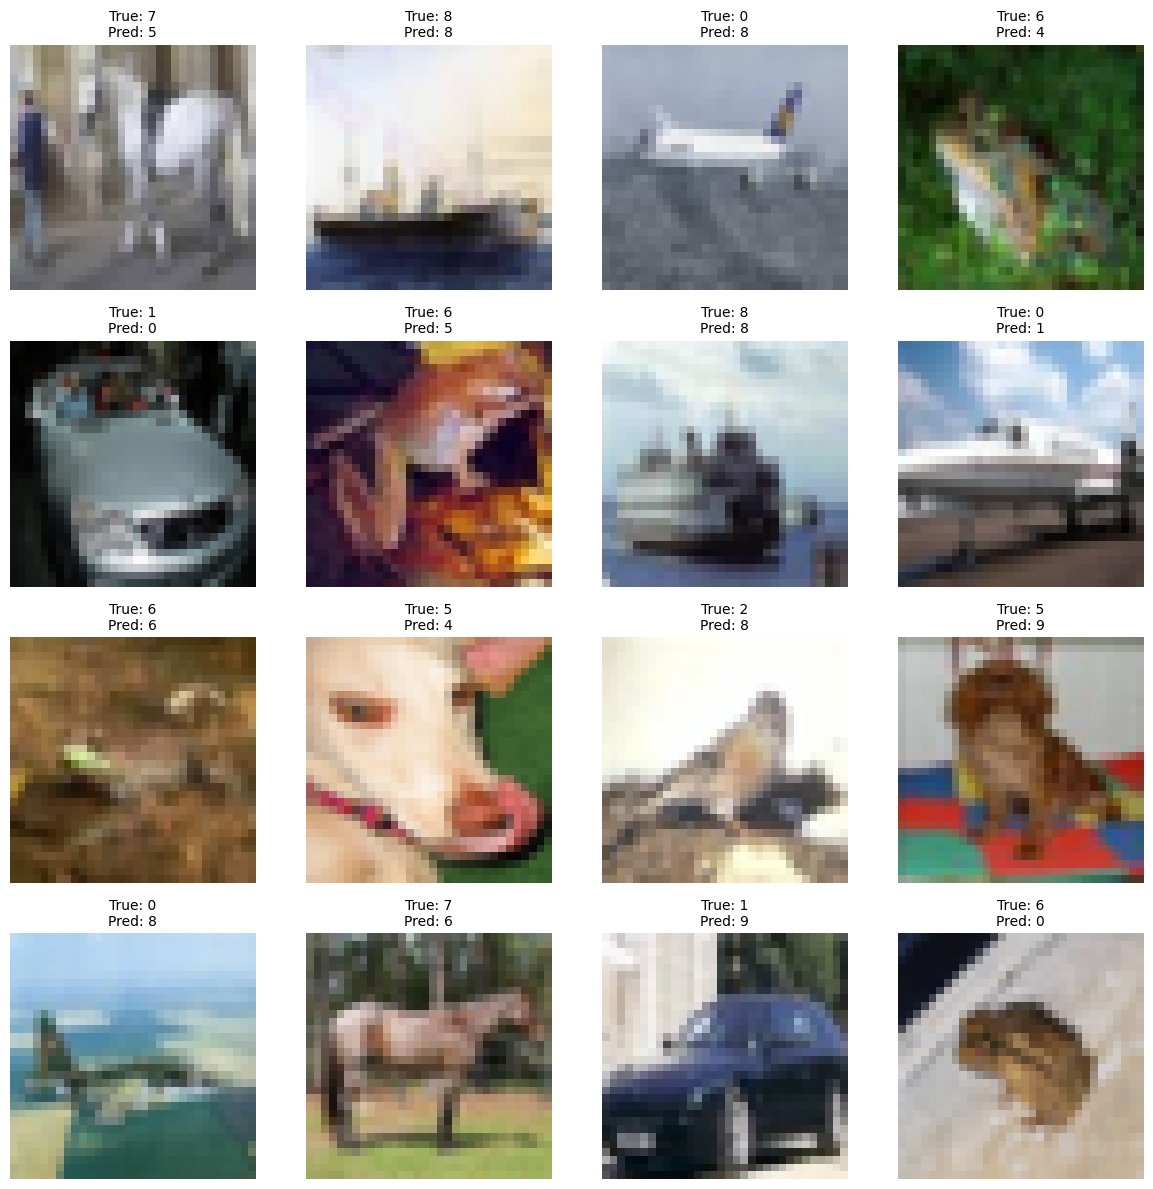

In [6]:
import matplotlib.pyplot as plt

# Function to plot images with predictions
def plot_images(images, true_labels, predictions):
    plt.figure(figsize=(12, 12))
    for i in range(16):
        plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].reshape(32, 32, 3))
        plt.title(f'True: {true_labels[i][0]}\nPred: {predictions[i]}', fontsize=10)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Plot some validation images with predictions
plot_images(X_val, y_val, y_val_pred_dt)


In [7]:
from google.colab import files
from PIL import Image
import numpy as np

# Function to classify a single uploaded image
def classify_image():
    uploaded = files.upload()
    for filename in uploaded.keys():
        # Load and preprocess the image
        img = Image.open(filename)
        img = img.resize((32, 32))  # Resize to match CIFAR-10 dimensions
        img_array = np.array(img) / 255.0  # Normalize pixel values
        img_flat = img_array.flatten().reshape(1, -1)  # Flatten the image

        # Make prediction
        prediction = dt_clf.predict(img_flat)
        print(f'The uploaded image is classified as: {prediction[0]} (class {prediction[0]})')

# Run the function to classify an uploaded image
classify_image()


Saving a-young-men-with-dark-hair-and-a-confident-smile-h-Ez_DRXUZTNa8hqCcHi8NNA-YBM_2MIBTCaGfiRoApQlcQ.jpeg to a-young-men-with-dark-hair-and-a-confident-smile-h-Ez_DRXUZTNa8hqCcHi8NNA-YBM_2MIBTCaGfiRoApQlcQ.jpeg
The uploaded image is classified as: 9 (class 9)


In [9]:
# Function to compare two uploaded images
def compare_images():
    uploaded = files.upload()
    images = []
    for filename in uploaded.keys():
        img = Image.open(filename)
        images.append(img)

    if len(images) != 2:
        print("Please upload exactly two images for comparison.")
        return

    # Display the images
    plt.figure(figsize=(12, 6))
    for i, img in enumerate(images):
        plt.subplot(1, 2, i + 1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()

    # Convert images to arrays for comparison
    img1_array = np.array(images[0])
    img2_array = np.array(images[1])

    # Display differences
    diff = cv2.absdiff(img1_array, img2_array)
    plt.figure(figsize=(6, 6))
    plt.imshow(diff)
    plt.title('Differences Between Images')
    plt.axis('off')
    plt.show()

# Run the function to compare uploaded images
compare_images()


Please upload exactly two images for comparison.


Conclusion
While the Decision Tree model provides a baseline for image classification tasks, its performance may be limited on complex datasets like CIFAR-10. Future improvements could involve experimenting with more sophisticated models such as Random Forests or Convolutional Neural Networks (CNNs) for better accuracy.